# Introduction to Keras

The goal of this notebook is to check that you have a good environment setup and to build a very simple shallow model.

You will:
* familiarize yourself with [Keras](https://www.keras.io)
* get up to speed with using IPython notebook for experiments and plotting


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Let's generate a simple "dummy" dataset that we will try to classify. Scikit-learn has a variety of useful functions for generating dataset of various kinds for experimentation.

In [2]:
from sklearn.datasets import make_blobs, make_circles
from keras.utils import np_utils

X, y = make_blobs(n_samples=1000,
                  centers=[[0.1, 0.1],[0.9, 0.9]],
                  cluster_std=0.3,
                  n_features=2)

y = np_utils.to_categorical(y)

print 'Vectors: \n', X[:10]
print 'Labels: \n', y[:10]

Using TensorFlow backend.


Vectors: 
[[ 0.70040517  1.18704799]
 [ 1.2344886   0.99297675]
 [ 0.51062157  0.60623518]
 [ 1.02897118  1.19302792]
 [-0.29068899 -0.38305808]
 [ 0.78039993  0.62046543]
 [ 0.74188247  0.92956304]
 [ 0.43920428 -0.30006629]
 [ 0.23809844  0.33237542]
 [ 0.11892414  0.29982663]]
Labels: 
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


Our dummy dataset consists of vectors in a 2-dimensional space and a class label that is either 0 or 1. We will represent the labels as **one-hot** vectors by using Keras's `to_categorical` helper function.

A one-hot vector is a binary vector where there is a 1 in the position corresponding to the class label and 0 elsewhere.

Inspect the data in a scatter plot.

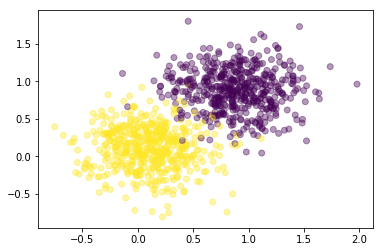

In [3]:
plt.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)

This is an "easy" dataset both because it is 2-dimensional and because it is **linearly separable**. This means we can draw a line to separate the two classes. Let's do that manually just for fun.

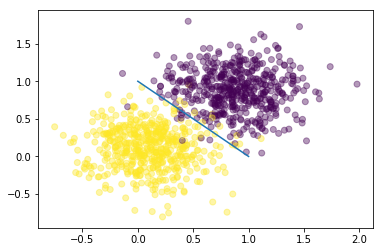

In [4]:
plt.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)
plt.plot([0, 1], [1, 0])

Now let's build a model to do this classification for us.

## Basics of modeling with Keras

[Keras](https://www.keras.io) is a simple neural net library. It helps you quickly define the structure of a network without having to write a lot of code.

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Keras gives you some flexible building blocks to build up your model. The `Sequence` model class is a simple container for a series of "layers" that process the input data in order. After creating a `Sequential` model...

In [6]:
model0 = Sequential()

... we can add layers to it one by one. For our first model we will use two layer types: `Dense` and `Activation`.

A [`Dense` layer](https://keras.io/layers/core/#dense) (also known as a **fully-connected** layer) consists of weights  and biases. An [`Activation` layer](https://keras.io/layers/core/#activation) applies a non-linear **activation function** on its input. We will make a "shallow" model for now: a fully-connected layer followed by a softmax activation.

In [7]:
model0.add(Dense(2, input_dim=2))
model0.add(Activation('softmax'))

The `Dense` constructor takes the output dimension as the first argument, in our case 2. Since this is the first layer in our model, we must also give it an `input_dim`, which is the dimension of our training data. Whenever we add more layers to our model, Keras knows what the input dimension will be by looking at the output dimension of the previous layer, so we can omit `input_dim` for later layers. The softmax activation doesn't ever change the dimension of the data, so it doesn't take an output dimension as an argument.

We can view the structure of the model with the handy `summary` method.

In [8]:
model0.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 2)             6           dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 2)             0           dense_1[0][0]                    
Total params: 6
Trainable params: 6
Non-trainable params: 0
____________________________________________________________________________________________________


Keras models process multiple input examples at a time in a batch. A shape of `(None, 2)` tells us that the number of examples is not fixed (the first dimension) and each example has 2 dimensions.

- - -
### Exercise 1 - Parameters

We have 6 parameters in our model total. Can you explain where these parameters are? Can you draw a picture of this model with the "neuron view"?

In [9]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model0, show_shapes=True).create(prog='dot', format='svg'))

<IPython.core.display.SVG object>

## Ingredients for Deep Learning

For any application of deep learning, four things come together in the solution:

> complete model = data + structure + loss + optimizer

You, the modeler, must choose the ingredients that together solve your problem. We have seen what our data looks like and we have specified the strucure of our model. Now we will specify a [loss](https://keras.io/objectives/) ([**cross entropy**](https://en.wikipedia.org/wiki/Cross_entropy)) and an optimizer (regular **stochatic gradient descent**). We also tell Keras to keep track of the accuracy during training.


In [10]:
from keras.optimizers import SGD

model0.compile(loss='categorical_crossentropy',
               optimizer=SGD(lr=0.04),
               metrics=['accuracy'])

Let's generate a train/test split of our data. Our model learns from the **training** data, and we reserve **test** data for testing the performance of our model after it is trained.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Train the model:

In [12]:
model0.fit(X_train, y_train, nb_epoch=20, batch_size=16)

Epoch 1/20


 16/750 [..............................] - ETA: 9s - loss: 1.6902 - acc: 0.1250

624/750 [=======================>......] - ETA: 0s - loss: 1.0439 - acc: 0.2612

750/750 [==============================] - 0s - loss: 1.0046 - acc: 0.2613     


Epoch 2/20
 16/750 [..............................] - ETA: 0s - loss: 0.7264 - acc: 0.5000

576/750 [======================>.......] - ETA: 0s - loss: 0.6836 - acc: 0.5521

750/750 [==============================] - 0s - loss: 0.6570 - acc: 0.5960     


Epoch 3/20
 16/750 [..............................] - ETA: 0s - loss: 0.5369 - acc: 0.8750

528/750 [====================>.........] - ETA: 0s - loss: 0.5382 - acc: 0.7519

750/750 [==============================] - 0s - loss: 0.5212 - acc: 0.7693     


Epoch 4/20
 16/750 [..............................] - ETA: 0s - loss: 0.4808 - acc: 0.8125

464/750 [=================>............] - ETA: 0s - loss: 0.4441 - acc: 0.8750

750/750 [==============================] - 0s - loss: 0.4339 - acc: 0.8880     


Epoch 5/20
 16/750 [..............................] - ETA: 0s - loss: 0.4365 - acc: 0.9375

608/750 [=======================>......] - ETA: 0s - loss: 0.3793 - acc: 0.9309

750/750 [==============================] - 0s - loss: 0.3730 - acc: 0.9360     


Epoch 6/20
 16/750 [..............................] - ETA: 0s - loss: 0.2704 - acc: 1.0000

688/750 [==========================>...] - ETA: 0s - loss: 0.3320 - acc: 0.9520

750/750 [==============================] - 0s - loss: 0.3291 - acc: 0.9533     


Epoch 7/20
 16/750 [..............................] - ETA: 0s - loss: 0.2909 - acc: 1.0000

608/750 [=======================>......] - ETA: 0s - loss: 0.2991 - acc: 0.9622

750/750 [==============================] - 0s - loss: 0.2961 - acc: 0.9600     


Epoch 8/20
 16/750 [..............................] - ETA: 0s - loss: 0.2582 - acc: 0.9375

496/750 [==================>...........] - ETA: 0s - loss: 0.2734 - acc: 0.9698

750/750 [==============================] - 0s - loss: 0.2705 - acc: 0.9693     


Epoch 9/20
 16/750 [..............................] - ETA: 0s - loss: 0.2045 - acc: 1.0000

512/750 [===================>..........] - ETA: 0s - loss: 0.2504 - acc: 0.9688

750/750 [==============================] - 0s - loss: 0.2498 - acc: 0.9693     


Epoch 10/20
 16/750 [..............................] - ETA: 0s - loss: 0.1975 - acc: 1.0000

704/750 [===========================>..] - ETA: 0s - loss: 0.2311 - acc: 0.9730

750/750 [==============================] - 0s - loss: 0.2332 - acc: 0.9707     


Epoch 11/20
 16/750 [..............................] - ETA: 0s - loss: 0.1630 - acc: 1.0000

368/750 [=============>................] - ETA: 0s - loss: 0.2123 - acc: 0.9810

750/750 [==============================] - 0s - loss: 0.2192 - acc: 0.9747     


Epoch 12/20
 16/750 [..............................] - ETA: 0s - loss: 0.1852 - acc: 1.0000



656/750 [=========================>....] - ETA: 0s - loss: 0.2080 - acc: 0.9771

750/750 [==============================] - 0s - loss: 0.2074 - acc: 0.9760     


Epoch 13/20
 16/750 [..............................] - ETA: 0s - loss: 0.2081 - acc: 1.0000

464/750 [=================>............] - ETA: 0s - loss: 0.2084 - acc: 0.9655

750/750 [==============================] - 0s - loss: 0.1974 - acc: 0.9760     


Epoch 14/20
 16/750 [..............................] - ETA: 0s - loss: 0.1631 - acc: 1.0000

704/750 [===========================>..] - ETA: 0s - loss: 0.1891 - acc: 0.9759

750/750 [==============================] - 0s - loss: 0.1885 - acc: 0.9760     


Epoch 15/20
 16/750 [..............................] - ETA: 0s - loss: 0.1808 - acc: 0.9375

560/750 [=====================>........] - ETA: 0s - loss: 0.1781 - acc: 0.9821

750/750 [==============================] - 0s - loss: 0.1809 - acc: 0.9760     


Epoch 16/20
 16/750 [..............................] - ETA: 0s - loss: 0.1827 - acc: 1.0000

624/750 [=======================>......] - ETA: 0s - loss: 0.1715 - acc: 0.9808

750/750 [==============================] - 0s - loss: 0.1742 - acc: 0.9787     


Epoch 17/20
 16/750 [..............................] - ETA: 0s - loss: 0.1336 - acc: 1.0000

640/750 [========================>.....] - ETA: 0s - loss: 0.1721 - acc: 0.9734

750/750 [==============================] - 0s - loss: 0.1682 - acc: 0.9773     


Epoch 18/20
 16/750 [..............................] - ETA: 0s - loss: 0.2057 - acc: 1.0000

496/750 [==================>...........] - ETA: 0s - loss: 0.1652 - acc: 0.9758

750/750 [==============================] - 0s - loss: 0.1627 - acc: 0.9773     


Epoch 19/20
 16/750 [..............................] - ETA: 0s - loss: 0.1915 - acc: 0.9375

320/750 [===========>..................] - ETA: 0s - loss: 0.1552 - acc: 0.9750

592/750 [======================>.......] - ETA: 0s - loss: 0.1535 - acc: 0.9797

750/750 [==============================] - 0s - loss: 0.1579 - acc: 0.9787     


Epoch 20/20
 16/750 [..............................] - ETA: 0s - loss: 0.1647 - acc: 1.0000

336/750 [============>.................] - ETA: 0s - loss: 0.1666 - acc: 0.9732

688/750 [==========================>...] - ETA: 0s - loss: 0.1561 - acc: 0.9767



750/750 [==============================] - 0s - loss: 0.1535 - acc: 0.9787     

Notice the signs of learning in the output. What are they?

Of course, we care much more about the accuracy of the model on the **test** data - this tells us that what the model learned on the training data **generalizes** to data the model never saw during training.

In [13]:
result = model0.evaluate(X_test, y_test)
print 'Test set loss: ', result[0]
print 'Test set accuracy: ', result[1]

 32/250 [==>...........................] - ETA: 0s

Test set loss:  0.158750680923
Test set accuracy:  0.971999997139


In general, we don't expect the model to do _better_ on the test set than the training set, but we hope that it does just as good.

## Decision Boundary

Since our example is in 2 dimensions only, we can iterate over a grid in the domain of the data and test each grid point to see how our model classifies it. Let's define a function to do this and plot the result.

In [14]:
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ[:,0] >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)

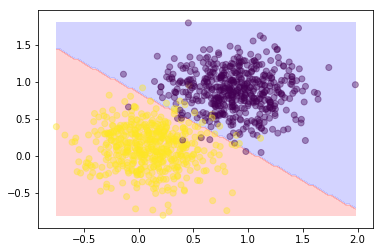

In [15]:
plot_decision_boundary(model0, X, y)

Congratulations! You trained your first model with Keras!

You don't need to understand the code in `plot_decision_boundary` in great detail, but you should understand what we are doing to create the plot: we are looking at each point on a grid that covers the input space, feeding it through the network to get the prediction, and coloring that point based on this prediction.

Why won't this approach for drawing the decision boundary work for more dimensions?

- - -
### Exercise 2 - Smaller model specification

Because it is so common to follow a full-connected layer with an activation function when building models, Keras allows you to specify the activation function when a `Dense` layer is created by using the keyword argument `activation`. Create the same model as we did above with this slightly more concise syntax. Refer to documentation for the `Dense` layer type [here](https://keras.io/layers/core/).

In [17]:
model1 = Sequential()
model1.add(Dense(2, input_dim=2, activation='softmax'))

In [18]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

<IPython.core.display.SVG object>

Compile and fit this smaller model. You should get very similar accuracy on the test data as we saw above.

In [19]:
from keras.optimizers import SGD

model1.compile(loss='categorical_crossentropy',
               optimizer=SGD(lr=0.04),
               metrics=['accuracy'])

#model1.compile(loss='categorical_crossentropy',
#               optimizer='sgd',
#               metrics=['accuracy'])

model1.fit(X_train, y_train, nb_epoch=20, batch_size=16)

Epoch 1/20
 16/750 [..............................] - ETA: 5s - loss: 0.5858 - acc: 0.6875

624/750 [=======================>......] - ETA: 0s - loss: 0.5357 - acc: 0.7260

750/750 [==============================] - 0s - loss: 0.5224 - acc: 0.7387     


Epoch 2/20
 16/750 [..............................] - ETA: 0s - loss: 0.5243 - acc: 0.7500

576/750 [======================>.......] - ETA: 0s - loss: 0.4430 - acc: 0.8299

750/750 [==============================] - 0s - loss: 0.4354 - acc: 0.8493     


Epoch 3/20
 16/750 [..............................] - ETA: 0s - loss: 0.4600 - acc: 0.9375

496/750 [==================>...........] - ETA: 0s - loss: 0.3914 - acc: 0.8972

750/750 [==============================] - 0s - loss: 0.3746 - acc: 0.9187     


Epoch 4/20
 16/750 [..............................] - ETA: 0s - loss: 0.3982 - acc: 0.9375

750/750 [==============================] - 0s - loss: 0.3302 - acc: 0.9453     


Epoch 5/20


 16/750 [..............................] - ETA: 0s - loss: 0.2208 - acc: 1.0000

512/750 [===================>..........] - ETA: 0s - loss: 0.2930 - acc: 0.9570

750/750 [==============================] - 0s - loss: 0.2968 - acc: 0.9560     


Epoch 6/20

 16/750 [..............................] - ETA: 0s - loss: 0.2916 - acc: 1.0000

448/750 [================>.............] - ETA: 0s - loss: 0.2741 - acc: 0.9643



750/750 [==============================] - 0s - loss: 0.2705 - acc: 0.9653     


Epoch 7/20
 16/750 [..............................] - ETA: 0s - loss: 0.2818 - acc: 1.0000

608/750 [=======================>......] - ETA: 0s - loss: 0.2510 - acc: 0.9655

750/750 [==============================] - 0s - loss: 0.2499 - acc: 0.9667     


Epoch 8/20
 16/750 [..............................] - ETA: 0s - loss: 0.2178 - acc: 1.0000

688/750 [==========================>...]

 - ETA: 0s - loss: 0.2328 - acc: 0.9680

750/750 [==============================] - 0s - loss: 0.2328 - acc: 0.9693     


Epoch 9/20
 16/750 [..............................] - ETA: 0s - loss: 0.3297 - acc: 0.8750

704/750 [===========================>..] - ETA: 0s - loss: 0.2188 - acc: 0.9759

750/750 [==============================] - 0s - loss: 0.2187 - acc: 0.9733     


Epoch 10/20
 16/750 [..............................] - ETA: 0s - loss: 0.1788 - acc: 0.9375

544/750 [====================>.........] - ETA: 0s - loss: 0.2101 - acc: 0.9761

750/750 [==============================] - 0s - loss: 0.2067 - acc: 0.9747     


Epoch 11/20
 16/750 [..............................] - ETA: 0s - loss: 0.1657 - acc: 1.0000

528/750 [====================>.........] - ETA: 0s - loss: 0.1915 - acc: 0.9830

750/750 [==============================] - 0s - loss: 0.1965 - acc: 0.9747     


Epoch 12/20
 16/750 [..............................] - ETA: 0s - loss: 0.1529 - acc: 1.0000

368/750 [=============>................] - ETA: 0s - loss: 0.1964 - acc: 0.9728

750/750 [==============================] - 0s - loss: 0.1878 - acc: 0.9747     


Epoch 13/20
 16/750 [..............................] - ETA: 0s - loss: 0.2697 - acc: 0.9375

352/750 [=============>................] - ETA: 0s - loss: 0.1718 - acc: 0.9801

688/750 [==========================>...] - ETA: 0s - loss: 0.1775 - acc: 0.9738

750/750 [==============================] - 0s - loss: 0.1801 - acc: 0.9747     


Epoch 14/20
 16/750 [..............................] - ETA: 0s - loss: 0.1544 - acc: 0.9375

384/750 [==============>...............] - ETA: 0s - loss: 0.1863 - acc: 0.9661

750/750 [==============================] - 0s - loss: 0.1732 - acc: 0.9760     


Epoch 15/20
 16/750 [..............................] - ETA: 0s - loss: 0.1547 - acc: 1.0000

416/750 [===============>..............] - ETA: 0s - loss: 0.1675 - acc: 0.9736

750/750 [==============================] - 0s - loss: 0.1673 - acc: 0.9760     


Epoch 16/20
 16/750 [..............................] - ETA: 0s - loss: 0.0620 - acc: 1.0000

496/750 [==================>...........] - ETA: 0s - loss: 0.1683 - acc: 0.9758

750/750 [==============================] - 0s - loss: 0.1618 - acc: 0.9773     


Epoch 17/20
 16/750 [..............................] - ETA: 0s - loss: 0.1476 - acc: 1.0000

560/750 [=====================>........] - ETA: 0s - loss: 0.1560 - acc: 0.9750

750/750 [==============================] - 0s - loss: 0.1569 - acc: 0.9760     


Epoch 18/20
 16/750 [..............................] - ETA: 0s - loss: 0.1406 - acc: 1.0000

656/750 [=========================>....] - ETA: 0s - loss: 0.1544 - acc: 0.9756

750/750 [==============================] - 0s - loss: 0.1525 - acc: 0.9773     


Epoch 19/20
 16/750 [..............................] - ETA: 0s - loss: 0.1062 - acc: 1.0000

528/750 [====================>.........] - ETA: 0s - loss: 0.1507 - acc: 0.9792

750/750 [==============================] - 0s - loss: 0.1485 - acc: 0.9787     


Epoch 20/20
 16/750 [..............................] - ETA: 0s - loss: 0.1553 - acc: 0.9375

560/750 [=====================>........] - ETA: 0s - loss: 0.1486 - acc: 0.9732

750/750 [==============================] - 0s - loss: 0.1448 - acc: 0.9773     

In [20]:
result = model0.evaluate(X_test, y_test)
print ''
print 'Test set loss: ', result[0]
print 'Test set accuracy: ', result[1]

 32/250 [==>...........................] - ETA: 0s


Test set loss:  0.158750680923
Test set accuracy:  0.971999997139


### Exercise 3 - Non separable data

- Use the function `make_moons` to create 2 non separable sets.
- Split it into training and testing set
- Does your model still work?
- plot the decision boundary to further investigate what's going on

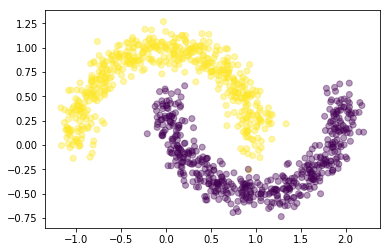

In [21]:
from sklearn.datasets import make_moons
X2, y2 = make_moons(n_samples=1000,
                 noise=0.1,
                 random_state=0)

y2 = np_utils.to_categorical(y2)
plt.scatter(X2[:,0], X2[:,1], c=y2[:,0], alpha=0.4)

In [22]:
model2 = Sequential()
model2.add(Dense(2, input_dim=2, activation='softmax'))

In [23]:
from keras.optimizers import SGD

model2.compile(loss='categorical_crossentropy',
               optimizer=SGD(lr=0.04),
               metrics=['accuracy'])

In [24]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)

In [25]:
model2.fit(X_train2, y_train2, nb_epoch=20, batch_size=16)

Epoch 1/20
 16/750 [..............................] - ETA: 5s - loss: 1.0371 - acc: 0.4375

750/750 [==============================] - 0s - loss: 0.7956 - acc: 0.4947     


Epoch 2/20
 16/750 [..............................] - ETA: 0s - loss: 0.5911 - acc: 0.5625

750/750 [==============================] - 0s - loss: 0.5873 - acc: 0.6000     


Epoch 3/20
 16/750 [..............................] - ETA: 0s - loss: 0.5035 - acc: 0.7500

750/750 [==============================] - 0s - loss: 0.4936 - acc: 0.6867     


Epoch 4/20
 16/750 [..............................] - ETA: 0s - loss: 0.4941 - acc: 0.6875

464/750 [=================>............] - ETA: 0s - loss: 0.4412 - acc: 0.7328

750/750 [==============================] - 0s - loss: 0.4407 - acc: 0.7333     


Epoch 5/20
 16/750 [..............................] - ETA: 0s - loss: 0.3754 - acc: 0.8125

750/750 [==============================] - 0s - loss: 0.4064 - acc: 0.7613     


Epoch 6/20
 16/750 [..............................] - ETA: 0s - loss: 0.3534 - acc: 0.9375

750/750 [==============================] - 0s - loss: 0.3817 - acc: 0.7853     


Epoch 7/20
 16/750 [..............................] - ETA: 0s - loss: 0.3324 - acc: 0.9375

750/750 [==============================] - 0s - loss: 0.3629 - acc: 0.7987     


Epoch 8/20
 16/750 [..............................] - ETA: 0s - loss: 0.3379 - acc: 0.8750

750/750 [==============================] - 0s - loss: 0.3481 - acc: 0.8160     


Epoch 9/20
 16/750 [..............................] - ETA: 0s - loss: 0.4286 - acc: 0.7500



750/750 [==============================] - 0s - loss: 0.3360 - acc: 0.8293     


Epoch 10/20
 16/750 [..............................] - ETA: 0s - loss: 0.3722 - acc: 0.8125

750/750 [==============================] - 0s - loss: 0.3261 - acc: 0.8360     


Epoch 11/20
 16/750 [..............................] - ETA: 0s - loss: 0.2748 - acc: 0.9375

750/750 [==============================] - 0s - loss: 0.3176 - acc: 0.8427     


Epoch 12/20


 16/750 [..............................] - ETA: 0s - loss: 0.1686 - acc: 0.9375

750/750 [==============================] - 0s - loss: 0.3105 - acc: 0.8467     


Epoch 13/20
 16/750 [..............................] - ETA: 0s - loss: 0.2463 - acc: 0.9375

750/750 [==============================] - 0s - loss: 0.3044 - acc: 0.8520     


Epoch 14/20


 16/750 [..............................]

 - ETA: 0s - loss: 0.2427 - acc: 0.8750

592/750 [======================>.......] - ETA: 0s - loss: 0.2929 - acc: 0.8632

750/750 [==============================] - 0s - loss: 0.2991 - acc: 0.8587     


Epoch 15/20
 16/750 [..............................] - ETA: 0s - loss: 0.2592 - acc: 0.8750

704/750 [===========================>..] - ETA: 0s - loss: 0.2913 - acc: 0.8636

750/750 [==============================] - 0s - loss: 0.2944 - acc: 0.8613     


Epoch 16/20
 16/750 [..............................] - ETA: 0s - loss: 0.2514 - acc: 0.8750

656/750 [=========================>....] - ETA: 0s - loss: 0.2915 - acc: 0.8659

750/750 [==============================] - 0s - loss: 0.2903 - acc: 0.8640     


Epoch 17/20
 16/750 [..............................] - ETA: 0s - loss: 0.1338 - acc: 1.0000

688/750 [==========================>...] - ETA: 0s - loss: 0.2833 - acc: 0.8663

750/750 [==============================] - 0s - loss: 0.2866 - acc: 0.8640     


Epoch 18/20
 16/750 [..............................] - ETA: 0s - loss: 0.2507 - acc: 0.9375

750/750 [==============================] - 0s - loss: 0.2836 - acc: 0.8667     


Epoch 19/20
 16/750 [..............................] - ETA: 0s - loss: 0.2928 - acc: 0.8125

640/750 [========================>.....] - ETA: 0s - loss: 0.2787 - acc: 0.8672

750/750 [==============================] - 0s - loss: 0.2809 - acc: 0.8653     


Epoch 20/20
 16/750 [..............................] - ETA: 0s - loss: 0.1506 - acc: 0.9375

720/750 [===========================>..] - ETA: 0s - loss: 0.2813 - acc: 0.8639

750/750 [==============================] - 0s - loss: 0.2782 - acc: 0.8653     

In [26]:
result = model2.evaluate(X_test2, y_test2)
print ''
print 'Test set loss: ', result[0]
print 'Test set accuracy: ', result[1]

 32/250 [==>...........................] - ETA: 0s


Test set loss:  0.280932427645
Test set accuracy:  0.860000000954


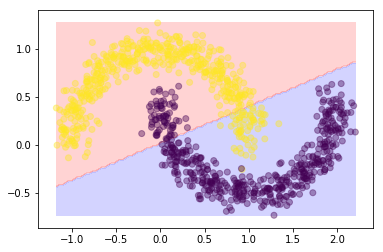

In [27]:
plot_decision_boundary(model2, X2, y2)